In [95]:
import numpy as np
import pandas as pd
import re

In [96]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [97]:

df = pd.read_csv(r'C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\processed\gurgaon_properties_cleaned.csv')

In [98]:
df.duplicated().sum()

121

In [99]:
df.head(2)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,bptp astaire gardens,sector 70a,1.6,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),4.0,4.0,3,"study room,others",1.0,NaN,1 to 5 Year Old,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['1 Fan', '1 Light', '2 Chimney', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"
1,house,puri diplomatic greens,sector 111,9.0,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,servant room,3.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi', 'Delhi Jaipur Highway', 'Red Roses Public School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'The Oberoi, Gurgaon']","['4 Light', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


## 1. areaWithType

In [100]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
809,1.25,1080.0,Carpet area: 1080 (100.34 sq.m.)
1522,5.65,3191.0,Plot area 342(285.96 sq.m.)Built Up area: 5000 sq.yards (4180.64 sq.m.)Carpet area: 4000 sq.yards (3344.51 sq.m.)
1838,0.45,535.0,Carpet area: 535 (49.7 sq.m.)
2668,13.00,2844.0,Plot area 316(264.22 sq.m.)
626,1.20,1640.0,Super Built up area 1640(152.36 sq.m.)Carpet area: 1148 sq.ft. (106.65 sq.m.)


In [101]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    if isinstance(text, str):
        match = re.search(r'Super Built up area (\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
    return None

In [102]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    if isinstance(text, str):
        match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
    return None

In [103]:
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    if isinstance(text, str):
        match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
        if match:
            sq_m_value = float(match.group(1))
            return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [104]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)


In [105]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
682,1.60,flat,1850.0,Super Built up area 1850(171.87 sq.m.),1850.0,NaN,NaN
2898,2.01,house,1546.0,Plot area 1549(143.91 sq.m.),NaN,NaN,NaN
1859,0.68,house,1755.0,Built Up area: 1755 (163.04 sq.m.),NaN,1755.0,NaN
247,2.26,flat,1650.0,Super Built up area 1777(165.09 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),1777.0,1700.0,1650.0
1338,4.30,house,1467.0,Plot area 163(136.29 sq.m.),NaN,NaN,NaN


In [106]:
df.duplicated().sum()

121

In [107]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [108]:
# Filter out rows where 'areaWithType' contains 'Plot', handling NaN values
filtered_df = df[df['areaWithType'].str.contains('Plot', na=False)]

# Display the first 5 rows of the filtered dataframe with specific columns
filtered_df[['price', 'property_type', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].head(5)


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
4,2.45,house,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq.yards (451.51 sq.m.)Carpet area: 351 sq.yards (293.48 sq.m.),NaN,540.0,351.0
5,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
8,0.60,house,558.0,Plot area 62(51.84 sq.m.),NaN,NaN,NaN
12,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,NaN,NaN


In [109]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    18
price_per_sqft           19
area                     19
areaWithType              1
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2617
carpet_area            1860
dtype: int64

In [110]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [111]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
5,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
8,0.60,house,558.0,Plot area 62(51.84 sq.m.),NaN,NaN,NaN
12,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,NaN,NaN
13,0.51,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN


In [112]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [113]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [114]:
# Ensure all entries are strings before applying the function
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].astype(str).apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [115]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
5,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
8,0.60,house,558.0,Plot area 62(51.84 sq.m.),NaN,62.00,NaN
12,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,7000.00,NaN
13,0.51,house,360.0,Plot area 40(33.45 sq.m.),NaN,40.00,NaN
22,5.70,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
31,5.80,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
41,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
42,0.75,house,640.0,Plot area 640(59.46 sq.m.),NaN,640.00,NaN
57,5.65,house,2367.0,Plot area 263(219.9 sq.m.),NaN,263.00,NaN


In [116]:
all_nan_df.built_up_area.value_counts()

built_up_area
360.00     41
300.00     28
200.00     20
502.00     19
270.00     18
500.00     15
150.00     14
900.00     13
400.00     12
215.00     11
600.00     10
240.00     10
250.00     10
161.00      9
316.00      9
100.00      8
60.00       8
160.00      8
1000.00     7
263.00      7
173.00      7
204.00      6
192.00      5
450.00      5
550.00      5
350.00      5
290.00      5
692.00      5
50.00       4
40.00       4
520.00      4
275.00      4
180.00      4
120.00      4
4000.00     4
62.00       4
342.00      3
163.00      3
418.00      3
402.00      3
109.00      3
130.00      3
1800.00     3
320.00      3
67.00       3
260.00      3
138.00      2
7000.00     2
292.00      2
61.00       2
135.00      2
117.00      2
172.00      2
1350.00     2
288.00      2
4500.00     2
2700.00     2
232.00      2
167.00      2
358.00      2
1125.00     2
3400.00     2
2500.00     2
1700.00     2
800.00      2
205.00      2
5000.00     1
610.00      1
1549.00     1
267.00      1
382.00

In [117]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [118]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [119]:
df.update(all_nan_df)

In [120]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    18
price_per_sqft           19
area                     19
areaWithType              1
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2071
carpet_area            1860
dtype: int64

In [121]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),4.0,4.0,3,"study room,others",1.0,NaN,1 to 5 Year Old,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['1 Fan', '1 Light', '2 Chimney', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",1848.0,1600.0,1400.0
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,servant room,3.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi', 'Delhi Jaipur Highway', 'Red Roses Public School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'The Oberoi, Gurgaon']","['4 Light', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,8000.0,NaN
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),3.0,3.0,3,study room,5.0,North-East,1 to 5 Year Old,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2000.0,1900.0,1800.0
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,servant room,3.0,East,10+ Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Arunodaya Deseret Eye Hospital', 'pracksht hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', '

## 2.additionalRoom

In [122]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [123]:
# Fill NaN values with an empty string to avoid issues with str.contains
df['additionalRoom'] = df['additionalRoom'].fillna('')

# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col, case=False).astype(int)

# Display the first few rows to verify
df.head()


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),4.0,4.0,3,"study room,others",1.0,NaN,1 to 5 Year Old,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['1 Fan', '1 Light', '2 Chimney', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",1848.0,1600.0,1400.0,1,0,0,0,1
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,servant room,3.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi', 'Delhi Jaipur Highway', 'Red Roses Public School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'The Oberoi, Gurgaon']","['4 Light', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,8000.0,NaN,0,1,0,0,0
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),3.0,3.0,3,study room,5.0,North-East,1 to 5 Year Old,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2000.0,1900.0,1800.0,1,0,0,0,0
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,servant room,3.0,East,10+ Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Arunodaya Deseret Eye Hospital', 'pracksht hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital

In [124]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1370,pooja room,0,0,0,1,0
1329,not available,0,0,0,0,0
3082,servant room,0,1,0,0,0
1004,not available,0,0,0,0,0
281,not available,0,0,0,0,0


In [125]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),4.0,4.0,3,"study room,others",1.0,NaN,1 to 5 Year Old,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['1 Fan', '1 Light', '2 Chimney', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",1848.0,1600.0,1400.0,1,0,0,0,1
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,servant room,3.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi', 'Delhi Jaipur Highway', 'Red Roses Public School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'The Oberoi, Gurgaon']","['4 Light', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,8000.0,NaN,0,1,0,0,0
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),3.0,3.0,3,study room,5.0,North-East,1 to 5 Year Old,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2000.0,1900.0,1800.0,1,0,0,0,0
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,servant room,3.0,East,10+ Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Arunodaya Deseret Eye Hospital', 'pracksht hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital

## 3.agePossession

In [126]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Aug-23                   7
Oct-24                   7
Dec-25                   7
Jan-24                   7
Nov-23                   5
Jun-24                   5
Aug-24                   4
Jul-24                   4
By 2025                  4
Sep-23                   4
Nov-24                   3
Feb-24                   3
Oct-23                   3
May-24                   3
Jan-25                   3
Oct-25                   2
Jan-26                   2
Apr-26                   2
Dec 2023                 2
Jul-25                   2
Mar-25                   2
Aug-25                   2
Sep-25                   2
Jul-27        

In [127]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [128]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [129]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              477
Old Property           310
Under Construction     140
Name: count, dtype: int64

In [130]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),4.0,4.0,3,"study room,others",1.0,NaN,Relatively New,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['1 Fan', '1 Light', '2 Chimney', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",1848.0,1600.0,1400.0,1,0,0,0,1
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,servant room,3.0,North-East,Relatively New,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi', 'Delhi Jaipur Highway', 'Red Roses Public School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'The Oberoi, Gurgaon']","['4 Light', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,8000.0,NaN,0,1,0,0,0
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),3.0,3.0,3,study room,5.0,North-East,Relatively New,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2000.0,1900.0,1800.0,1,0,0,0,0
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,servant room,3.0,East,Old Property,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Arunodaya Deseret Eye Hospital', 'pracksht hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 

## 4.furnishDetails

In [131]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3792,"['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '8 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '3 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3078,"['6 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park']"
3735,NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3227,"['1 Exhaust Fan', '1 Microwave', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3749,[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [132]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_34208\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [133]:
furnishings_df.shape

(3804, 19)

In [134]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_34208\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [135]:
furnishings_df.sample(5)

,Sofa,Modular Kitchen,Light,Geyser,Chimney,Wardrobe,TV,Fan,AC,Stove,Fridge,Exhaust Fan,Dining Table,Bed,Washing Machine,Microwave,Water Purifier,Curtains
277,0,1,5,3,0,3,0,4,0,0,0,1,0,0,0,0,0,0
1075,0,1,20,0,1,2,0,6,0,0,0,1,0,0,0,0,0,0
252,0,1,10,1,1,2,0,0,0,0,0,1,0,0,0,0,0,0
2978,0,1,0,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0
2171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [138]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

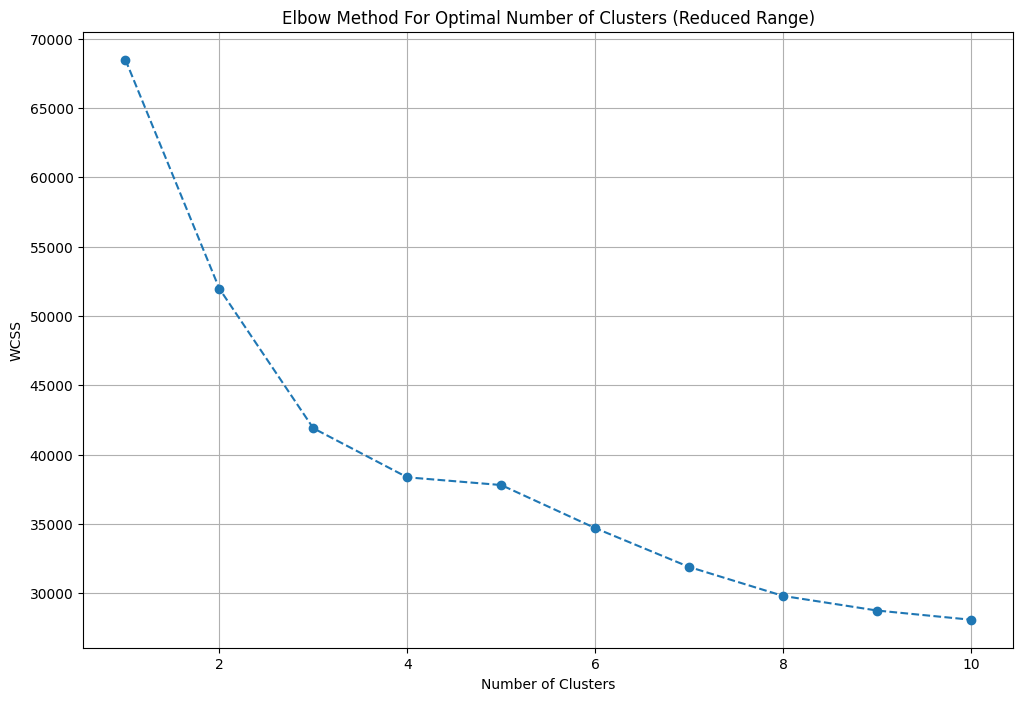

In [139]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [140]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [141]:
df = df.iloc[:,:-18]

In [142]:
df['furnishing_type'] = cluster_assignments

In [143]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3433,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Geyser', '7 Light', '1 Chimney', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
1693,"['2 Wardrobe', '4 Fan', '1 Geyser', '4 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
1665,NaN,0
3425,"['1 Exhaust Fan', '1 Light', '1 Curtains', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
3036,NaN,0


## 5.features

In [144]:
df[['society','features']].sample(5)

,society,features
684,ss almeria,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2290,signature global solera,"['Power Back-up', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Fitness Centre / GYM']"
922,gls avenue 51,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park']"
1556,lotus homz,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']"
1108,tulip violet,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"


In [145]:
df['features'].isnull().sum()

636

In [146]:
import pandas as pd
app_df = pd.read_csv(r'C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\raw\appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [147]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [148]:
temp_df = df[df['features'].isnull()]

In [149]:
temp_df.shape

(636, 26)

In [150]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [151]:
df.loc[temp_df.index,'features'] = x.values

In [152]:
df['features'].isnull().sum()

482

In [153]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [154]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [155]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
441,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3773,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
features_binary_df.shape

(3804, 130)

In [157]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

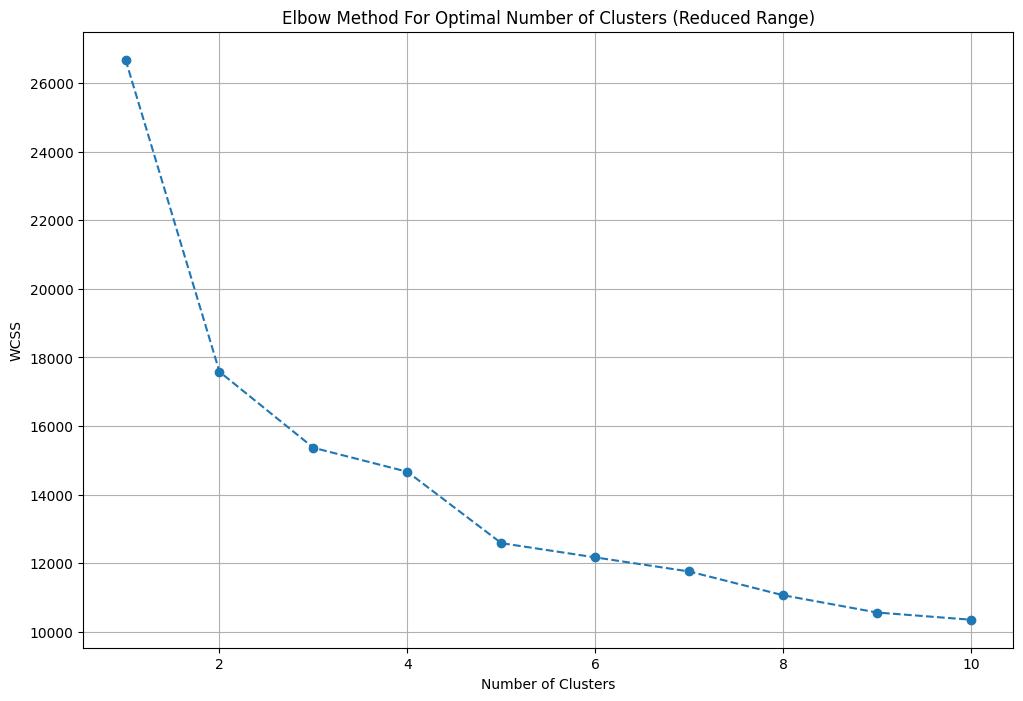

In [158]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [159]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [160]:
df['luxury_score'] = luxury_score

In [161]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),4.0,4.0,3,"study room,others",1.0,NaN,Relatively New,"['Sector 54 Chowk Metro Station', 'Airia Mall', 'Southern Peripheral Road', 'Badshahpur Sohna Rd Hwy', 'Kunskapsskolan International School', 'DPG Degree College', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Intellion Edge', 'Hyatt Regency Gurgaon', 'De Adventure Park', 'Tau DeviLal Sports Complex']","['1 Fan', '1 Light', '2 Chimney', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",1848.0,1600.0,1400.0,1,0,0,0,1,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Park, Visitor Parking]",42
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,servant room,3.0,North-East,Relatively New,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi', 'Delhi Jaipur Highway', 'Red Roses Public School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'The Oberoi, Gurgaon']","['4 Light', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,8000.0,NaN,0,1,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Visitor Parking, Swimming Pool, Park, Security Personnel, Low Density Society, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",112
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),3.0,3.0,3,study room,5.0,North-East,Relatively New,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall', 'Gurgaon - Delhi Expy, Sector 75A', 'Kunskapsskolan School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harves

In [162]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [163]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2916,flat,jammu and kashmir bank employees cghs,sector 9a,0.95,6129.0,1550.0,Super Built up area 1550(144 sq.m.),3.0,3.0,2,5.0,West,Moderately Old,1550.0,NaN,NaN,0,0,0,0,1,0,30
2749,flat,bestech park view residency,sector 2,1.40,7865.0,1780.0,Super Built up area 1780(165.37 sq.m.),3.0,3.0,3+,6.0,North,Old Property,1780.0,NaN,NaN,0,0,0,0,0,1,107
141,flat,pyramid urban homes 2,sector 86,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2.0,2.0,1,10.0,NaN,Relatively New,NaN,NaN,520.0,0,0,0,0,0,0,15
1986,flat,godrej frontier,sector 80,1.40,6189.0,2262.0,Super Built up area 2262(210.15 sq.m.)Built Up area: 1922 sq.ft. (178.56 sq.m.)Carpet area: 1634 sq.ft. (151.8 sq.m.),3.0,4.0,2,6.0,South,Moderately Old,2262.0,1922.0,1634.0,0,1,0,1,0,0,111
1046,flat,adani m2k oyster grande,sector 102,2.60,10007.0,2598.0,Super Built up area 2598(241.36 sq.m.),3.0,3.0,3,2.0,North-East,Relatively New,2598.0,NaN,NaN,1,1,1,0,0,0,118


In [164]:
df.shape

(3804, 23)

In [165]:
import os

# Define the absolute path to the processed data folder
data_path = r"C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\feature_engineering"

# Create the directory if it doesn't exist
os.makedirs(data_path, exist_ok=True)

# Assuming df is already defined, save the DataFrame to the specified path
df.to_csv(os.path.join(data_path, "gurgaon_properties_cleaned_v2.csv"), index=False)

